<a href="https://colab.research.google.com/github/Aditya10CR7/OpenCV-Python/blob/main/Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
image = cv2.imread("./NYFW_ streetstyle.jpg")

In [4]:
type(image)

numpy.ndarray

In [5]:
image.shape

(840, 560, 3)

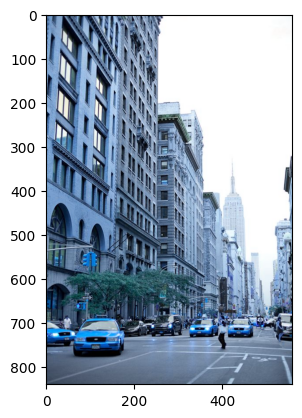

In [6]:
plt.imshow(image)

In [7]:
new_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

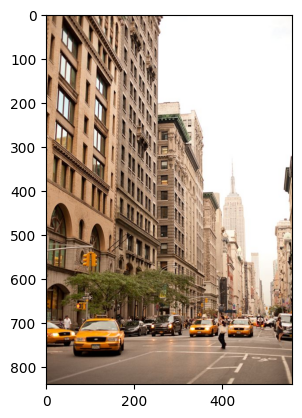

In [8]:
plt.imshow(new_image)

In [12]:
"""
1. Splitting image channels
"""
r,g,b =cv2.split(image)
"""print('r',r.shape)
print('g',g.shape)
print('b',b.shape)
"""
image = cv2.merge((r,g,b))

In [13]:
"""
Resize the image
"""

s = 10
w = int(image.shape[1]*s/100)
h = int(image.shape[0]*s/100)
dim = (w,h)
re_size = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
re_size.shape

(84, 56, 3)

In [14]:
"""
Rotate Operation
"""
(h, w) = new_image.shape[:2]

c = (w/2, h/2)
angle = 90
m = cv2.getRotationMatrix2D(c, angle, 1.0)
rotate_90 = cv2.warpAffine(new_image, m, (h,w))

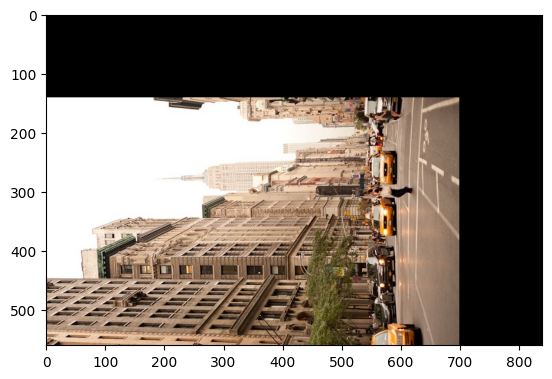

In [15]:
plt.imshow(rotate_90)

In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [52]:
yolo = cv2.dnn.readNet("./yolov3.weights", "./yolov3.cfg")

In [53]:
classes = []


with open("./coco.names", 'r') as f:
  classes = f.read().splitlines()

In [54]:
len(classes)

80

In [55]:
img = cv2.imread("./street.jpg")

blob = cv2.dnn.blobFromImage(img, 1/255, (320,320), (0,0,0), swapRB=True, crop = False)

In [56]:
blob.shape

(1, 3, 320, 320)

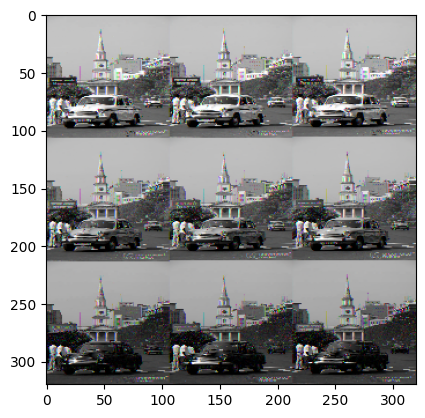

In [57]:
#print image

i = blob[0].reshape(320,320,3)
plt.imshow(i)

In [58]:
yolo.setInput(blob)

In [59]:
output_layer_name = yolo.getUnconnectedOutLayersNames()
layeroutput = yolo.forward(output_layer_name)

In [66]:
boxes = []
confidences = []
class_ids = []

for output in layeroutput :
  for detection in output :
    score = detection[5:]
    class_id = np.argmax(score)
    confidence = score[class_id]
    if confidence > 0.7:
      center_x = int(detection[0]* width)
      center_x = int(detection[0]* height)
      w = int(detection[0]* width)
      h = int(detection[0]* height)

      x = int(center_x- w/2)
      y = int(center_y- h/2)

      boxes.append([x,y,w,h])
      confidences.append(float(confidence))
      class_ids.append(class_ids)

NameError: ignored

In [67]:
len(boxes)

0

In [68]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

In [69]:
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0, 255, size = (len(boxes), 3) )

In [70]:
if len(indexes) > 0:
  for i in indexes.flatten():
    x,y,w,h = boxes[i]

    label = str(classes[class_ids[i]])
    confi = str(round(confidences[i], 2))
    color = colors[i]

    cv2.rectangle(img, (x,y), (x+w, y+h), color, 2)
    cv2.putText(img, label +" "+confi, (x,y+20), font, 2, (255, 255, 255), 2)

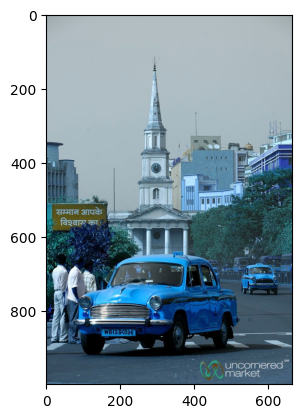

In [71]:
plt.imshow(img)

In [72]:
cv2.imwrite("./img.jpg", img)

True